<a href="https://colab.research.google.com/github/gaurangdave/mnist_digits_recognition/blob/main/notebooks/01_explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

* In this notebook we explore the data and identify required transformation for accurate classification.
* We also need to split the train/test to avoid any data snooping.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
from google.colab import userdata
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

## Mount Google Drive

In [2]:
## mount google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Retrieve the Google Drive path stored in secrets
shared_folder_path = userdata.get("SHARED_DRIVE_PATH")

## Access MNIST Dataset from Google Drvie

In [4]:
raw_data_csv = f"{shared_folder_path}/raw_mnist_data.csv"

mnist = pd.read_csv(raw_data_csv)

In [5]:
mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


## Quick Data Exploration

In [6]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [7]:
mnist.isna().sum()

,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
pixel5,0
...,...
pixel781,0
pixel782,0
pixel783,0
pixel784,0


Observations:
* Looks like no missing values since `isna().sum()` returns 0s and all dtypes is `int64`

Lets check how the class is distributed

In [8]:
# plotting class distribution to understand and verify the train/test split
class_counts = mnist["class"].value_counts().sort_index()

# Convert to a DataFrame for visualization
class_distribution = pd.DataFrame({
    "Digit": class_counts.index,
    "Count": class_counts.values
})

# Plot using Plotly
fig = px.bar(
    class_distribution,
    x="Digit",
    y="Count",
    title="Class Distribution in MNIST Dataset",
    labels={"Digit": "Digit Class", "Count": "Number of Instances"},
    text="Count"
)

# Add count labels on bars
fig.update_traces(textposition="outside")

# Show plot
fig.show()

Observations:
* So we have `Class 1` which occurs slightly more than rest of the classes, lets calculate the percentages and then create stratified split.

In [9]:
class_distribution["Percent"] = (class_distribution["Count"] / class_distribution["Count"].sum()) * 100

In [10]:
class_distribution

,Digit,Count,Percent
0,0,6903,9.861429
1,1,7877,11.252857
2,2,6990,9.985714
3,3,7141,10.201429
4,4,6824,9.748571
5,5,6313,9.018571
6,6,6876,9.822857
7,7,7293,10.418571
8,8,6825,9.750000
9,9,6958,9.940000


## Stratified Split

In [11]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [12]:
for train_idx, test_idx in splitter.split(mnist, mnist["class"]):
    mnist_train_set = mnist.iloc[train_idx].reset_index(drop=True)
    mnist_test_set = mnist.iloc[test_idx].reset_index(drop=True)

* Lets verify if train and test set have similar class distribution

In [13]:
## verifying training data class distribution
(mnist_train_set["class"].value_counts().sort_index() / mnist_train_set.shape[0]) * 100

,count
class,
0,9.860714
1,11.253571
2,9.985714
3,10.201786
4,9.748214
5,9.017857
6,9.823214
7,10.417857
8,9.750000


Observations:
* The distribution is more or less similar to main dataset

In [14]:
## verifying test data class distribution
(mnist_test_set["class"].value_counts().sort_index() / mnist_test_set.shape[0]) * 100

,count
class,
0,9.864286
1,11.250000
2,9.985714
3,10.200000
4,9.750000
5,9.021429
6,9.821429
7,10.421429
8,9.750000


Observations:
* Even the test set distribution matches the dataset. We can now save the train/test dataframes to google drive

## Saving Test/Train set to Google Drive

In [15]:
train_set_path = f"{shared_folder_path}/mnist_train_set.csv"
test_set_path = f"{shared_folder_path}/mnist_test_set.csv"

In [16]:
mnist_train_set.to_csv(train_set_path, index=False)
mnist_test_set.to_csv(test_set_path, index=False)

## Data Exploration

In [17]:
## verifying training data class distribution
(mnist_train_set["class"].value_counts().sort_index() / mnist_train_set.shape[0]) * 100

,count
class,
0,9.860714
1,11.253571
2,9.985714
3,10.201786
4,9.748214
5,9.017857
6,9.823214
7,10.417857
8,9.750000


Observation:
* So the class distribution is more or less even, so we shouldn't face any issue of unrepresentation or over representation of any particular class

### Pixel Intensity Aggregation Summary

In [18]:
mnist_train_set.shape

(56000, 785)

In [19]:
mnist_train_set.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# Calculate aggregated statistics
pixel_stats = mnist_train_set.iloc[:, :-1].aggregate(['min', 'max', 'mean', 'std']).T

# Summary for all pixels combined
overall_stats = {
    "min_pixel_value": mnist_train_set.iloc[:, :-1].min().min(),
    "max_pixel_value": mnist_train_set.iloc[:, :-1].max().max(),
    "mean_pixel_value": mnist_train_set.iloc[:, :-1].mean().mean(),
    "std_pixel_value": mnist_train_set.iloc[:, :-1].std().mean()
}

print("Overall Pixel Value Stats:", overall_stats)

Overall Pixel Value Stats: {'min_pixel_value': 0, 'max_pixel_value': 255, 'mean_pixel_value': 33.40283570973032, 'std_pixel_value': 49.25044784975305}


Observations:
* Our mean is ~33 which is more closer to 0 than to max value 255, which tells us that majority of the pixels are 0 or closer to 0, i.e. black and there are fewer white pixels which might be representing the actual numbers
* The standard deviation tells us the pixel intensities have range of values i.e. different shades of white/grey.
* Lets create a function to render the images based on pixels passed

### Rendering Images

In [21]:
def show_digit(image_data, label):
  image_data = image_data.reshape(28, 28)  # MNIST images are 28x28 pixels
  # Render the image using Matplotlib
  plt.imshow(image_data, cmap="gray")  # Use 'gray' colormap to render grayscale
  plt.title(f"Rendered Image - Label: {label}")  # Display the label as the title
  plt.axis("off")  # Remove axes for better visualization
  plt.show()

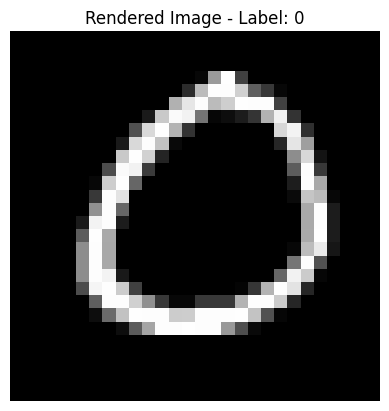

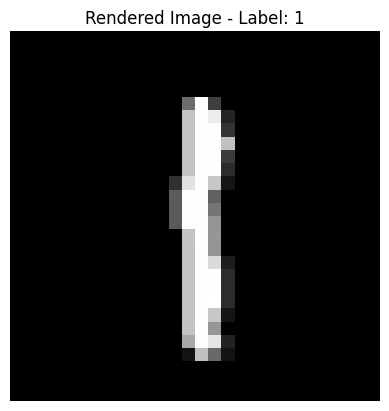

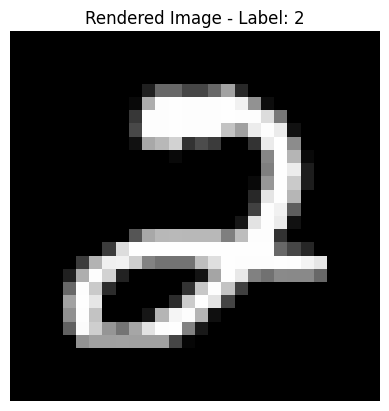

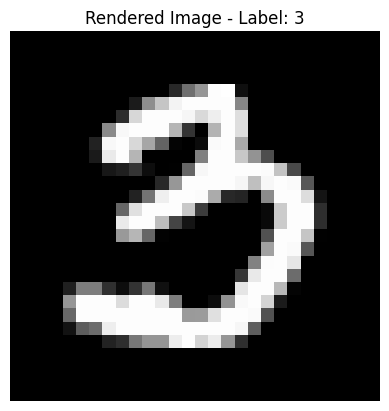

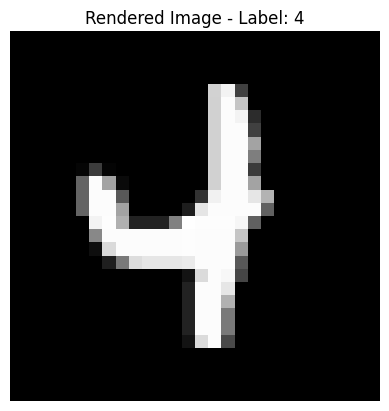

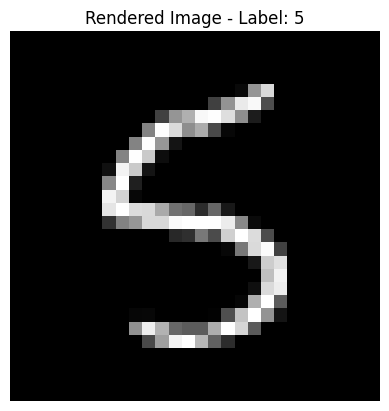

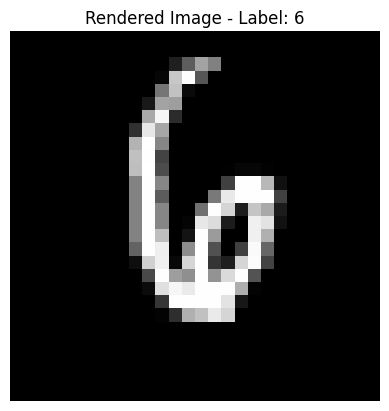

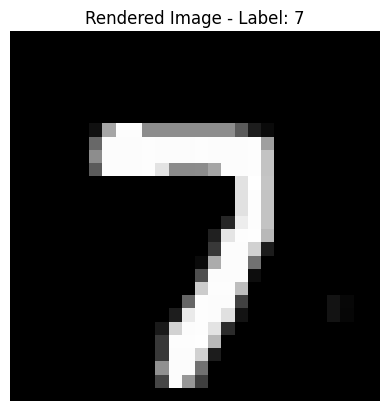

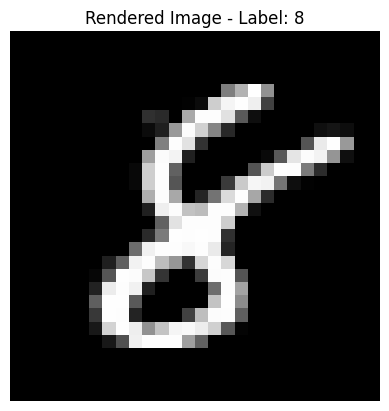

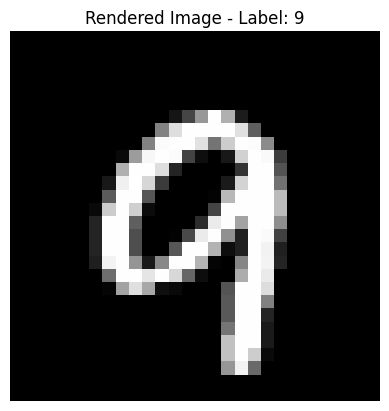

In [22]:
## lets render every unique class
for digit in range(10):
  ## get a random row that matches the digit
  random_row = mnist_train_set[mnist_train_set["class"] == digit].sample(1)
  image_data = random_row.iloc[0, :-1].values
  label = digit
  show_digit(image_data=image_data, label=label)




### Pixel Intensity Distribution

* Intensity distribution will tell us how the intensity values are distributed across different pixels. We can use this information to see if `normalization` or `binarization` is required or helpful.
* This would also tell us if there are any outliers e.g. If certain pixels are always black, corner of the image or something, but then there are instances where those pixels are highlighted that could be an outlier which might cause issues to our training.  

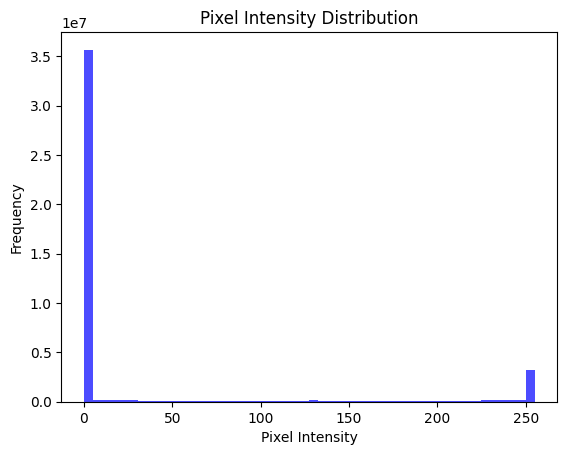

In [23]:
# Flatten the pixel values into a 1D array
pixel_values = mnist_train_set.iloc[:, :-1].values.flatten()

# Plot the histogram
plt.hist(pixel_values, bins=50, color="blue", alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

Observations:
* The intesity distribution confirms our earlier understanding that majority pixels of the images are black, and the spike near 255 are the pixels in white which represents our digits.
* The low frequency values in the range 50 - 200 represents the intermediate gray values, which might be the gray edges of the digits.
* We can try normalizing few random images and visualizing few digits to observe the effects.

### Normalization

In [24]:
def display_comparison(original, normalized, rows=2, cols=5, digit=0):
    plt.figure(figsize=(12, 6))
    random_row = mnist_train_set[mnist_train_set["class"] == digit].sample(1)
    idx = random_row.index[0]
    # Original Image
    plt.subplot(rows, cols, 1)
    original_row = original.iloc[idx]
    image_data = original_row[:-1].values
    show_digit(image_data=image_data, label=digit)

    # Normalized Image
    plt.subplot(rows, cols, 2)
    normalized_row = normalized.iloc[idx]
    image_data = normalized_row[:-1].values
    show_digit(image_data=image_data, label=digit)


    # plt.tight_layout()
    plt.show()

In [25]:
## TODO Only normalize features not the target

normalized_train_set = mnist_train_set.iloc[:,:-1] / 255.0
print(np.min(normalized_train_set))
print(np.max(normalized_train_set))

0.0
1.0


In [26]:
normalized_train_set.head(4)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
## add class column
normalized_train_set["class"] = mnist_train_set["class"]

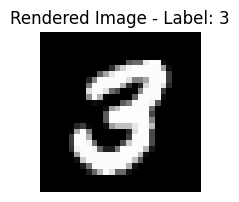

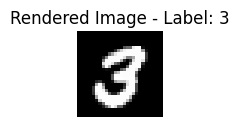

In [28]:
display_comparison(mnist_train_set, normalized_train_set, digit=3)

Observations:
* So visually it seems normalization is keeping the image consistent so we can normalize the image before training.

### Statistical Properties After Normalization

In [42]:
# Check the range of normalized pixel values
print(f"Min of mins in normalized data is {normalized_train_set.iloc[:, :-1].min().min()} and max of min in normalized data is {normalized_train_set.iloc[:, :-1].min().max()}")
print(f"Min of max in normalized data is {normalized_train_set.iloc[:, :-1].max().min()} and max of max in normalized data is {normalized_train_set.iloc[:, :-1].max().max()}")

# # Check the mean and standard deviation
print(f"Aggregated mean of normalized data is {normalized_train_set.iloc[:, :-1].mean().mean()}")
print(f"Aggregated standard daviation of normalized data is {normalized_train_set.iloc[:, :-1].std().mean()}")


Min of mins in normalized data is 0.0 and max of min in normalized data is 0.0
Min of max in normalized data is 0.0 and max of max in normalized data is 1.0
Aggregated mean of normalized data is 0.13099151258717773
Aggregated mean of normalized data is 0.19313901117550253


### Verify Feature Variability

In [44]:
# Compute per-feature standard deviations
original_std = mnist_train_set.iloc[:, :-1].std()
normalized_std = normalized_train_set.iloc[:, :-1].std()

In [47]:
# Calculate the ratio of normalized std to original std
std_ratio = normalized_std / original_std

# Check the overall statistics of the ratio
std_ratio.describe()

,0
count,7.180000e+02
mean,3.921569e-03
std,2.015425e-15
min,3.921569e-03
25%,3.921569e-03
50%,3.921569e-03
75%,3.921569e-03
max,3.921569e-03


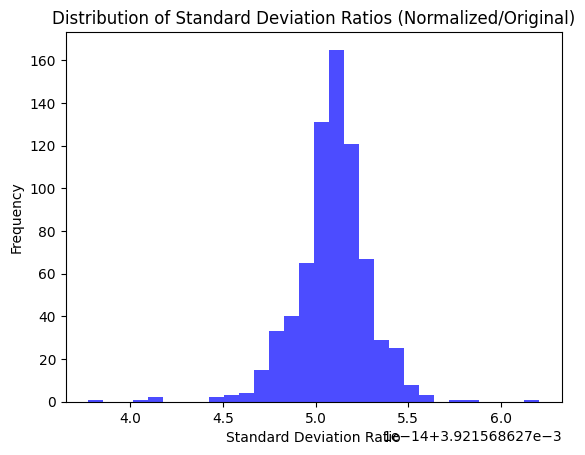

In [46]:
plt.hist(std_ratio, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Standard Deviation Ratios (Normalized/Original)')
plt.xlabel('Standard Deviation Ratio')
plt.ylabel('Frequency')
plt.show()

Observations:
* So our expected outcome here was that mean should be close to 1, i.e the variability in feature is maintained in normalized data. But thats not the case the mean is `~0.0039` which is a lot less than we expected.
* This could be because in non-normalized background data, the variability of background pixels would be less (closer to 0) and then in normalized data it further reduces because we normalized the data between [0 ,1].
* Since large number of pixels are background pixels they would impact the mean of normalized std making it smaller.
* We should try and verify the std ratio of non background pixels.

In [48]:
original_std.describe()

,0
count,784.000000
mean,49.250448
std,44.187580
min,0.000000
25%,4.600259
50%,36.747561
75%,100.759966
max,113.874707


In [52]:
thresholds = [10, 20, 50]

# Filter high-variability features for each threshold
for threshold in thresholds:
    high_variability_features = original_std[original_std > threshold]
    print(f"Threshold: {threshold}")
    print(f"Number of high-variability pixels: {len(high_variability_features)}")
    print(high_variability_features.describe())  # Check distribution of selected pixels
    print("\n")

Threshold: 10
Number of high-variability pixels: 522
count    522.000000
mean      72.678987
std       35.837460
min       10.042632
25%       36.956763
50%       81.882870
75%      108.194343
max      113.874707
dtype: float64


Threshold: 20
Number of high-variability pixels: 465
count    465.000000
mean      79.782782
std       31.269735
min       20.320173
25%       50.646300
50%       91.795886
75%      108.807999
max      113.874707
dtype: float64


Threshold: 50
Number of high-variability pixels: 352
count    352.000000
mean      94.604778
std       19.027681
min       50.236734
25%       81.313457
50%      103.810330
75%      110.134382
max      113.874707
dtype: float64


